### Disclaimer: 
Please note that due to shuffling in an earlier stage, the accuracy rates may vary slightly from those presented in our initial presentation and our main complete codebase. We have taken steps to minimize such discrepancies in the future. We apologize for any inconsistencies.

# Part 4: Decision Tree Classification

We first used __Decision Tree Classifier__ on each of the four train/test data sets we have initialized above. In the following way, we will determine accuracies and demonstrate the confusion matrix and decision tree upon concluding this section.

### Importing libraries and datasets

In [5]:
# For data processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sb.set(style='whitegrid')

# Read feature DataFrames (without the '2' prefix)
X_train = pd.read_csv('X1_train.csv')
X_test = pd.read_csv('X1_test.csv')
X2_train = pd.read_csv('X2_train.csv')
X2_test = pd.read_csv('X2_test.csv')
X3_train = pd.read_csv('X3_train.csv')
X3_test = pd.read_csv('X3_test.csv')
X4_train = pd.read_csv('X4_train.csv')
X4_test = pd.read_csv('X4_test.csv')

# Read target Series
y_train = pd.read_csv('y1_train.csv').squeeze()
y_test = pd.read_csv('y1_test.csv').squeeze()
y2_train = pd.read_csv('y2_train.csv').squeeze()
y2_test = pd.read_csv('y2_test.csv').squeeze()
y3_train = pd.read_csv('y3_train.csv').squeeze()
y3_test = pd.read_csv('y3_test.csv').squeeze()
y4_train = pd.read_csv('y4_train.csv').squeeze()
y4_test = pd.read_csv('y4_test.csv').squeeze()

In [6]:
# Decision Tree using Train Data
import os
print("OMP_NUM_THREADS =", os.environ.get("OMP_NUM_THREADS"))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object

OMP_NUM_THREADS = None


In [7]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### 1.1. Decision Tree Classifier for __X_train__ dataset.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7979094076655052

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.75

Rates for Train Dataset:
False Negative Rate (FNR): 0.6747
False Positive Rate (FPR): 0.0098
True Positive Rate (TPR / Recall): 0.3253
True Negative Rate (TNR / Specificity): 0.9902

Rates for Test Dataset:
False Negative Rate (FNR): 0.8400
False Positive Rate (FPR): 0.0423
True Positive Rate (TPR / Recall): 0.1600
True Negative Rate (TNR / Specificity): 0.9577



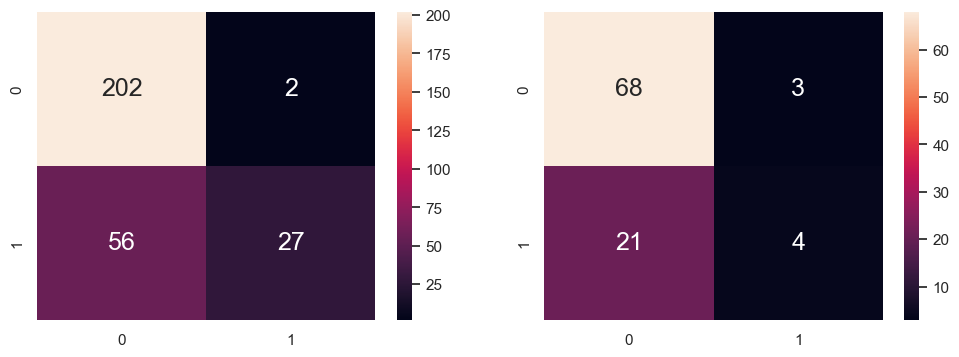

In [9]:
# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train)
y_test_pred1 = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.metrics import confusion_matrix

# Get confusion matrix values for train and test
cm_train = confusion_matrix(y_train, y_train_pred1)
cm_test = confusion_matrix(y_test, y_test_pred1)

def print_rates(cm, dataset_name=""):
    TN, FP, FN, TP = cm.ravel()

    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0

    print(f"Rates for {dataset_name} Dataset:")
    print(f"False Negative Rate (FNR): {FNR:.4f}")
    print(f"False Positive Rate (FPR): {FPR:.4f}")
    print(f"True Positive Rate (TPR / Recall): {TPR:.4f}")
    print(f"True Negative Rate (TNR / Specificity): {TNR:.4f}")
    print()

# Print rates for both train and test
print_rates(cm_train, "Train")
print_rates(cm_test, "Test")


[Text(0.54, 0.9, 'Gender <= 0.5\ngini = 0.411\nsamples = 287\nvalue = [204, 83]\nclass = Age'),
 Text(0.3, 0.7, 'Age <= 55.5\ngini = 0.329\nsamples = 226\nvalue = [179, 47]\nclass = Age'),
 Text(0.16, 0.5, 'Age <= 18.5\ngini = 0.277\nsamples = 187\nvalue = [156, 31]\nclass = Age'),
 Text(0.08, 0.3, 'Smoking History <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Gender'),
 Text(0.04, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Gender'),
 Text(0.12, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Age'),
 Text(0.24, 0.3, 'Age <= 35.5\ngini = 0.259\nsamples = 183\nvalue = [155, 28]\nclass = Age'),
 Text(0.2, 0.1, 'gini = 0.322\nsamples = 109\nvalue = [87, 22]\nclass = Age'),
 Text(0.28, 0.1, 'gini = 0.149\nsamples = 74\nvalue = [68, 6]\nclass = Age'),
 Text(0.44, 0.5, 'Age <= 78.0\ngini = 0.484\nsamples = 39\nvalue = [23, 16]\nclass = Age'),
 Text(0.4, 0.3, 'Age <= 67.5\ngini = 0.47\nsamples = 37\nvalue = [23, 14]\nclass = Age'),
 Text(0.36, 0.1, 'gini = 0.494

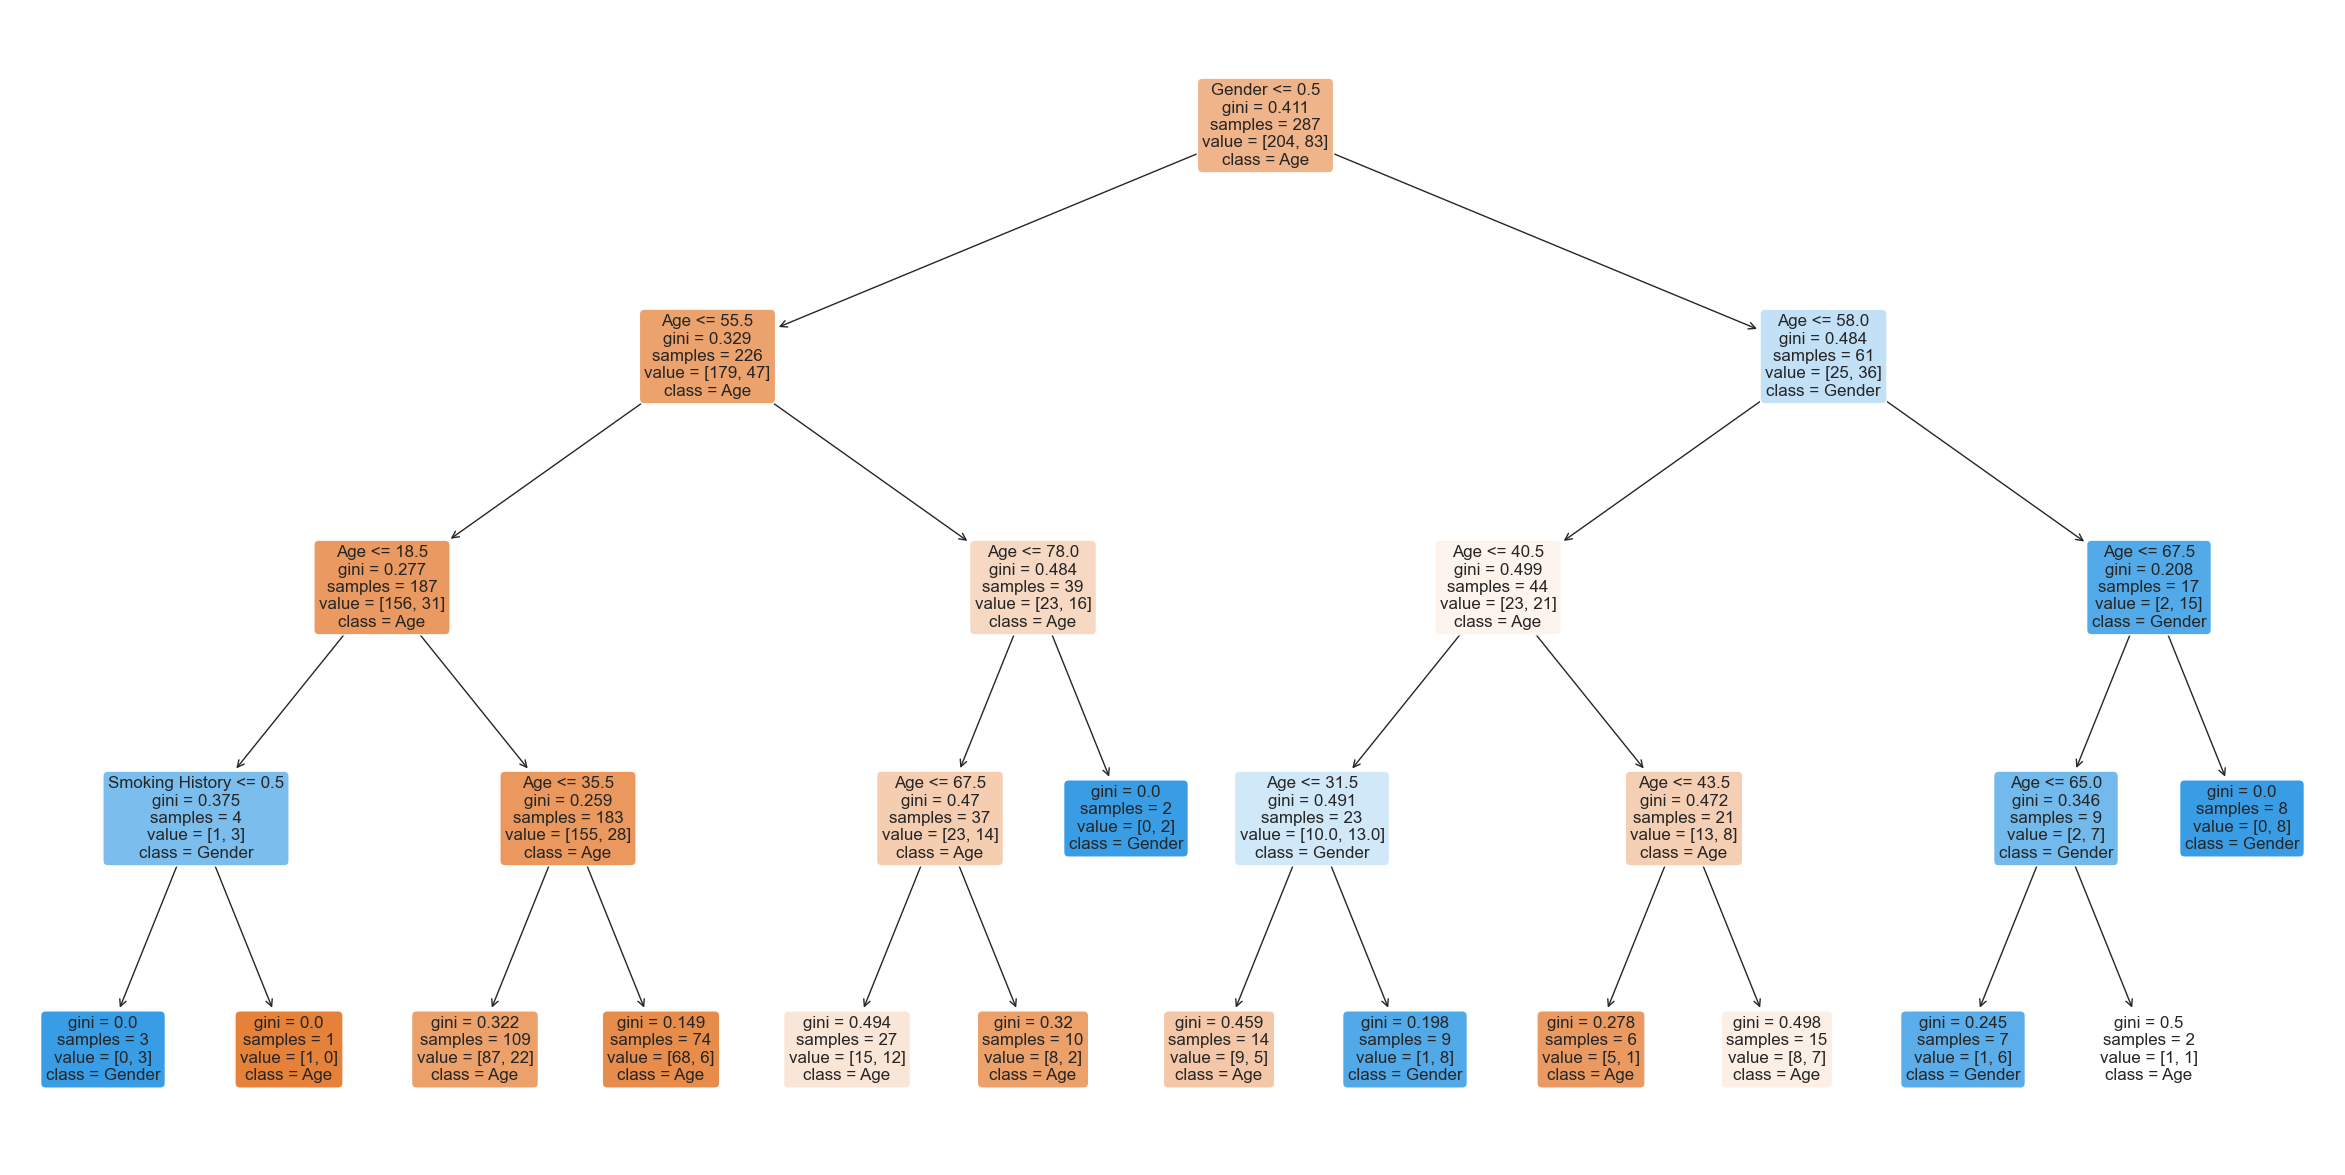

In [10]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,15))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Age", "Gender", "Smoking History"])

### 1.2. Decision Tree Classifier for __X2_train__ dataset.

In [12]:
dectree2 = DecisionTreeClassifier(max_depth = 4)
dectree2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.6125, 0.9, 'Adenopathy <= 0.5\ngini = 0.408\nsamples = 287\nvalue = [205, 82]\nclass = Age'),
 Text(0.375, 0.7, 'Age <= 57.5\ngini = 0.197\nsamples = 208\nvalue = [185, 23]\nclass = Age'),
 Text(0.2, 0.5, 'Age <= 18.0\ngini = 0.125\nsamples = 179\nvalue = [167, 12]\nclass = Age'),
 Text(0.1, 0.3, 'Smoking History <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Age'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Gender'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Age'),
 Text(0.3, 0.3, 'Age <= 30.5\ngini = 0.117\nsamples = 177\nvalue = [166, 11]\nclass = Age'),
 Text(0.25, 0.1, 'gini = 0.034\nsamples = 58\nvalue = [57, 1]\nclass = Age'),
 Text(0.35, 0.1, 'gini = 0.154\nsamples = 119\nvalue = [109, 10]\nclass = Age'),
 Text(0.55, 0.5, 'Smoking History <= 0.5\ngini = 0.471\nsamples = 29\nvalue = [18, 11]\nclass = Age'),
 Text(0.5, 0.3, 'Gender <= 0.5\ngini = 0.426\nsamples = 26\nvalue = [18, 8]\nclass = Age'),
 Text(0.45, 0.1

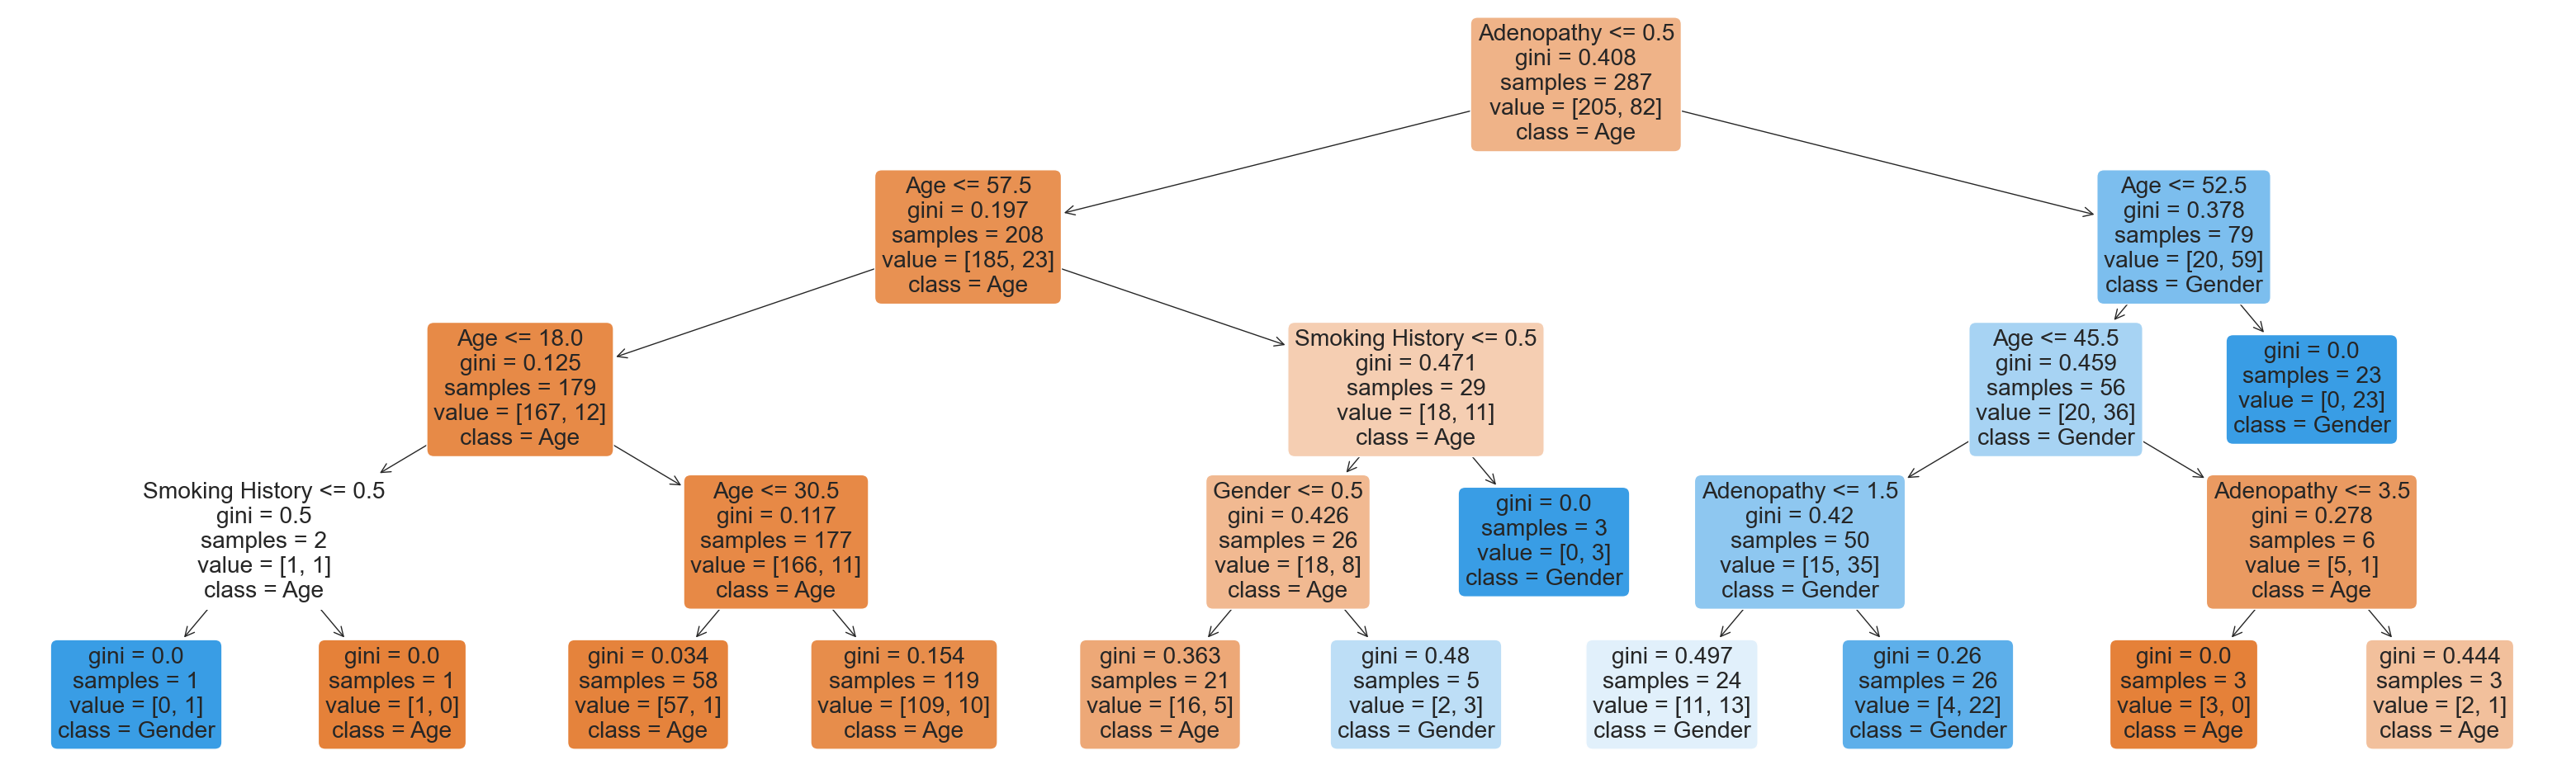

In [13]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=X2_train.columns, 
          class_names=["Age", "Gender", "Currently Smoking", "Smoking History", "Adenopathy"])


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8815331010452961

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8229166666666666

Rates for Train Dataset:
False Negative Rate (FNR): 0.2073
False Positive Rate (FPR): 0.0829
True Positive Rate (TPR / Recall): 0.7927
True Negative Rate (TNR / Specificity): 0.9171

Rates for Test Dataset:
False Negative Rate (FNR): 0.4231
False Positive Rate (FPR): 0.0857
True Positive Rate (TPR / Recall): 0.5769
True Negative Rate (TNR / Specificity): 0.9143



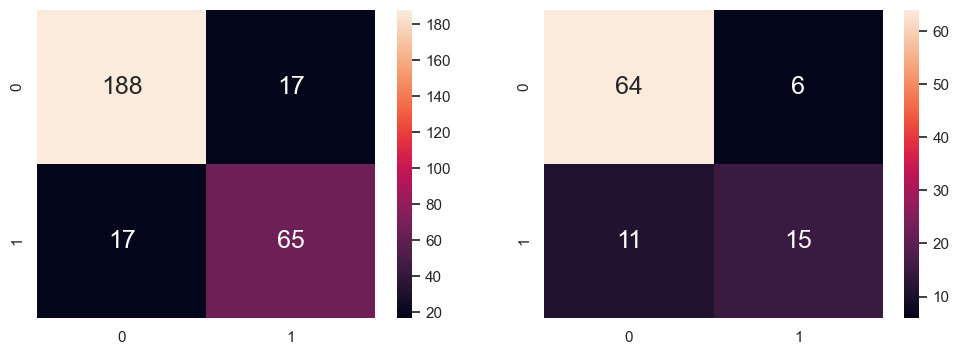

In [14]:
# Predict Response corresponding to Predictors
y_train_pred2 = dectree2.predict(X2_train)
y_test_pred2 = dectree2.predict(X2_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(X2_train, y2_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(X2_test, y2_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y2_train, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y2_test, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.metrics import confusion_matrix

# Get confusion matrix values for train and test
cm_train2 = confusion_matrix(y2_train, y_train_pred2)
cm_test2 = confusion_matrix(y2_test, y_test_pred2)

# Print rates for both train and test
print_rates(cm_train2, "Train")
print_rates(cm_test2, "Test")


### 1.3. Decision Tree Classifier for __X3_train__ dataset.

In [16]:
dectree3 = DecisionTreeClassifier(max_depth = 4)
dectree3.fit(X3_train, y3_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5625, 0.9, 'Treatment Response <= 2.5\ngini = 0.408\nsamples = 287\nvalue = [205, 82]\nclass = Age'),
 Text(0.5, 0.7, 'Treatment Response <= 1.5\ngini = 0.112\nsamples = 218\nvalue = [205, 13]\nclass = Age'),
 Text(0.25, 0.5, 'Risk <= 0.5\ngini = 0.049\nsamples = 200\nvalue = [195, 5]\nclass = Age'),
 Text(0.125, 0.3, 'Treatment Response <= 0.5\ngini = 0.011\nsamples = 173\nvalue = [172, 1]\nclass = Age'),
 Text(0.0625, 0.1, 'gini = 0.0\nsamples = 140\nvalue = [140, 0]\nclass = Age'),
 Text(0.1875, 0.1, 'gini = 0.059\nsamples = 33\nvalue = [32, 1]\nclass = Age'),
 Text(0.375, 0.3, 'Age <= 57.0\ngini = 0.252\nsamples = 27\nvalue = [23, 4]\nclass = Age'),
 Text(0.3125, 0.1, 'gini = 0.153\nsamples = 24\nvalue = [22, 2]\nclass = Age'),
 Text(0.4375, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Gender'),
 Text(0.75, 0.5, 'Risk <= 0.5\ngini = 0.494\nsamples = 18\nvalue = [10, 8]\nclass = Age'),
 Text(0.625, 0.3, 'Gender <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nc

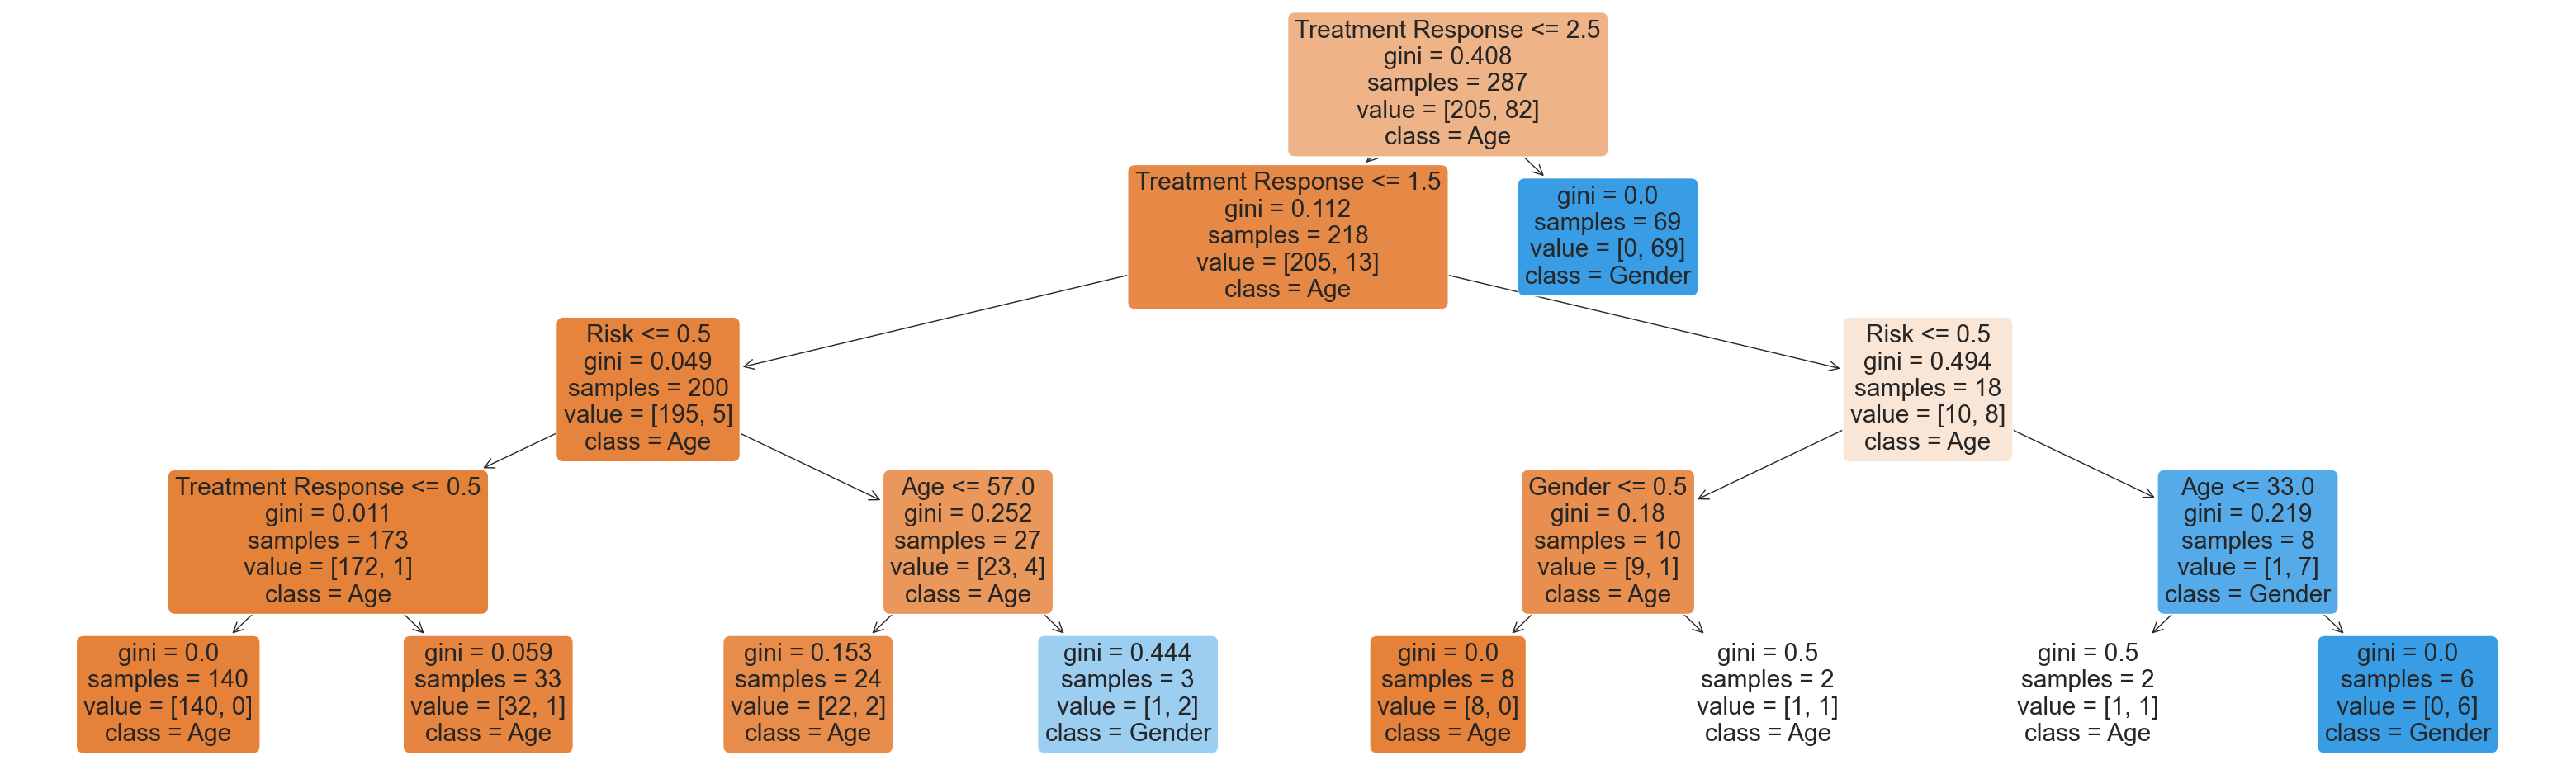

In [17]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=X3_train.columns, 
          class_names=["Age", "Gender", "Currently Smoking", "Smoking History", "Adenopathy", "Risk", "Treatment Response"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9790940766550522

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9270833333333334

Rates for Train Dataset:
False Negative Rate (FNR): 0.0610
False Positive Rate (FPR): 0.0049
True Positive Rate (TPR / Recall): 0.9390
True Negative Rate (TNR / Specificity): 0.9951

Rates for Test Dataset:
False Negative Rate (FNR): 0.1154
False Positive Rate (FPR): 0.0571
True Positive Rate (TPR / Recall): 0.8846
True Negative Rate (TNR / Specificity): 0.9429



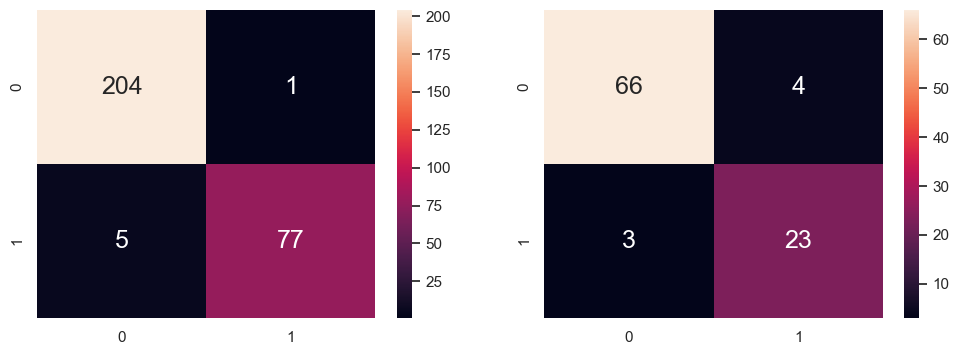

In [18]:
# Predict Response corresponding to Predictors
y_train_pred3 = dectree3.predict(X3_train)
y_test_pred3 = dectree3.predict(X3_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(X3_train, y3_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(X3_test, y3_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y3_train, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y3_test, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Get confusion matrix values for train and test
cm_train3 = confusion_matrix(y3_train, y_train_pred3)
cm_test3 = confusion_matrix(y3_test, y_test_pred3)

# Print rates for both train and test
print_rates(cm_train3, "Train")
print_rates(cm_test3, "Test")

### 1.4. Decision Tree Classifier for __X4_train__ dataset.

In [20]:
dectree4 = DecisionTreeClassifier(max_depth = 4)
dectree4.fit(X4_train, y4_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.6166666666666667, 0.9, 'Treatment Response <= 2.5\ngini = 0.396\nsamples = 287\nvalue = [209, 78]\nclass = Age'),
 Text(0.43333333333333335, 0.7, 'Stage <= 0.5\ngini = 0.111\nsamples = 221\nvalue = [208, 13]\nclass = Age'),
 Text(0.26666666666666666, 0.5, 'Treatment Response <= 1.5\ngini = 0.064\nsamples = 210\nvalue = [203, 7]\nclass = Age'),
 Text(0.13333333333333333, 0.3, 'Tumor <= 3.5\ngini = 0.02\nsamples = 194\nvalue = [192, 2]\nclass = Age'),
 Text(0.06666666666666667, 0.1, 'gini = 0.01\nsamples = 192\nvalue = [191, 1]\nclass = Age'),
 Text(0.2, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Age'),
 Text(0.4, 0.3, 'Lymph Nodes <= 1.0\ngini = 0.43\nsamples = 16\nvalue = [11, 5]\nclass = Age'),
 Text(0.3333333333333333, 0.1, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = Age'),
 Text(0.4666666666666667, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Gender'),
 Text(0.6, 0.5, 'Age <= 62.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = Gender'),
 

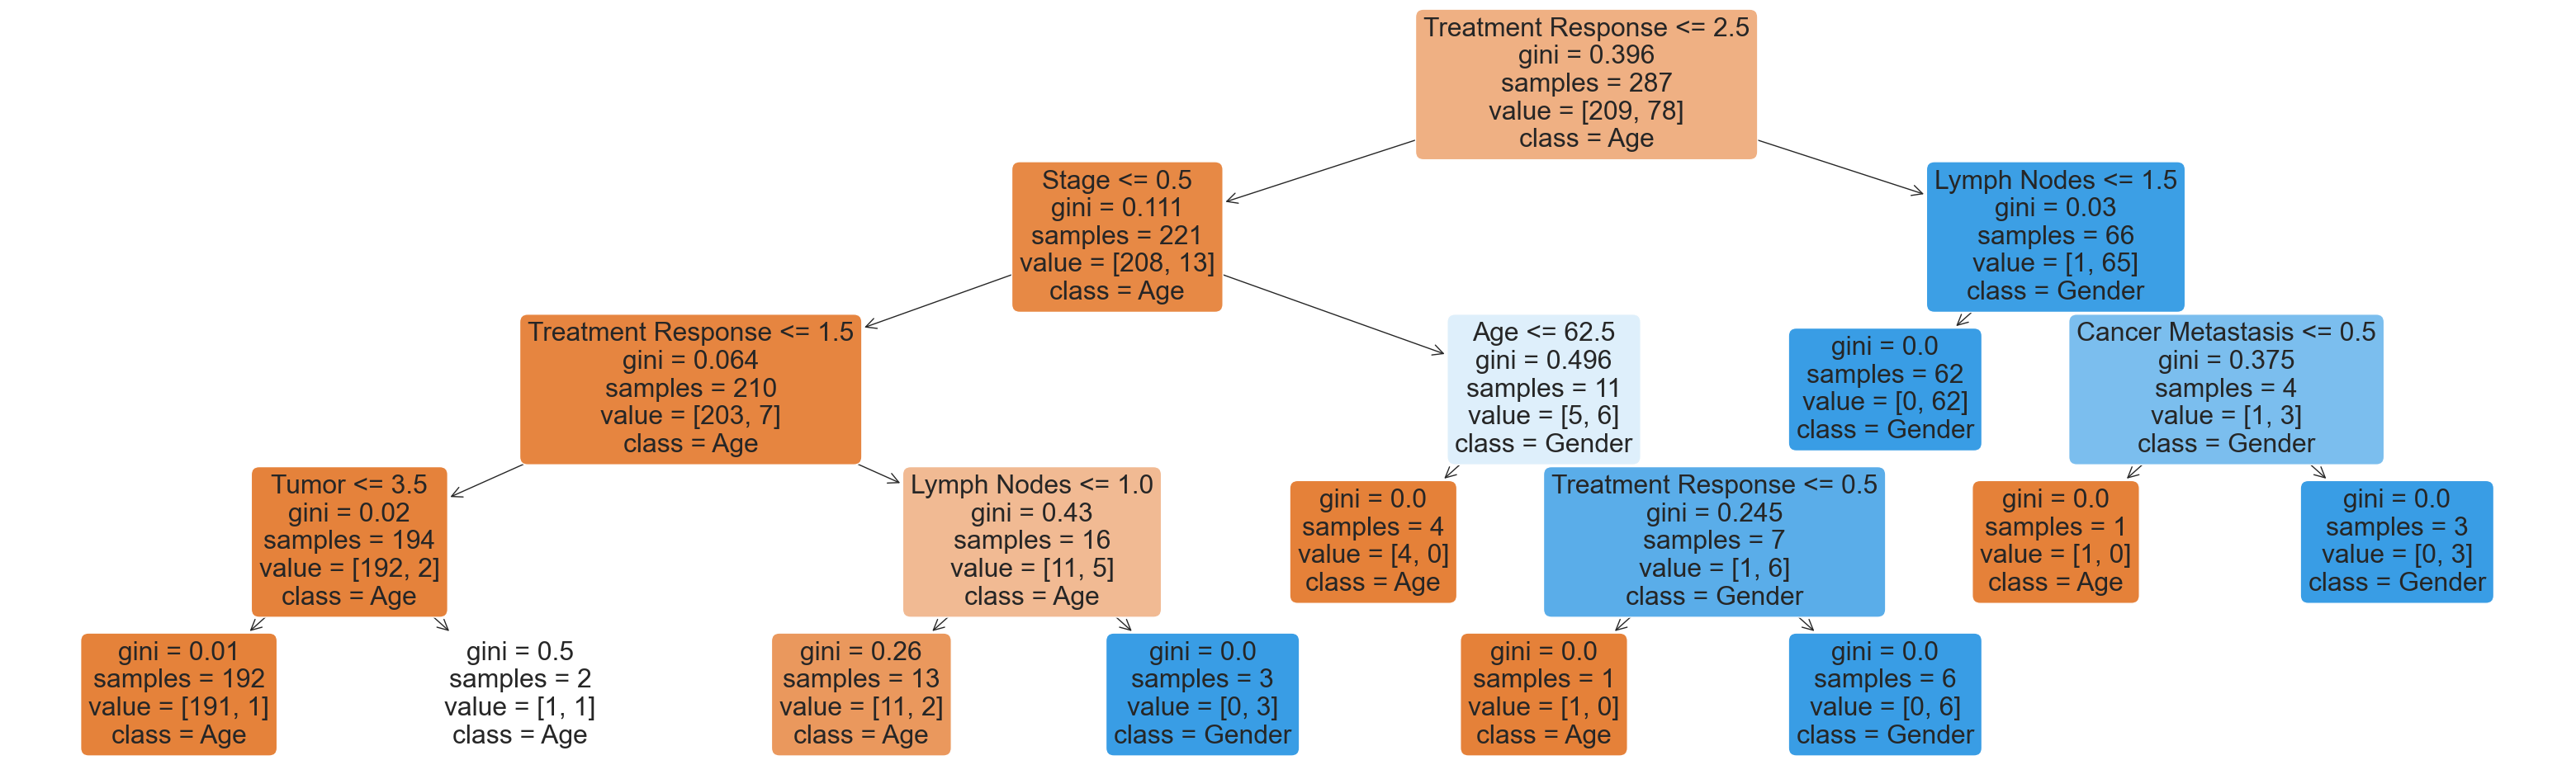

In [21]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=X4_train.columns, 
          class_names=["Age", "Gender", "Currently Smoking", "Smoking History", "Radiotherapy History", "Thyroid Function", "Physical Examination", "Adenopathy", 
                    "Types of Thyroid Cancer (Pathology)", "Focality", "Risk", "Tumor", 
                    "Lymph Nodes", "Cancer Metastasis", "Stage", "Treatment Response"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9860627177700348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9166666666666666

Rates for Train Dataset:
False Negative Rate (FNR): 0.0513
False Positive Rate (FPR): 0.0000
True Positive Rate (TPR / Recall): 0.9487
True Negative Rate (TNR / Specificity): 1.0000

Rates for Test Dataset:
False Negative Rate (FNR): 0.2333
False Positive Rate (FPR): 0.0152
True Positive Rate (TPR / Recall): 0.7667
True Negative Rate (TNR / Specificity): 0.9848



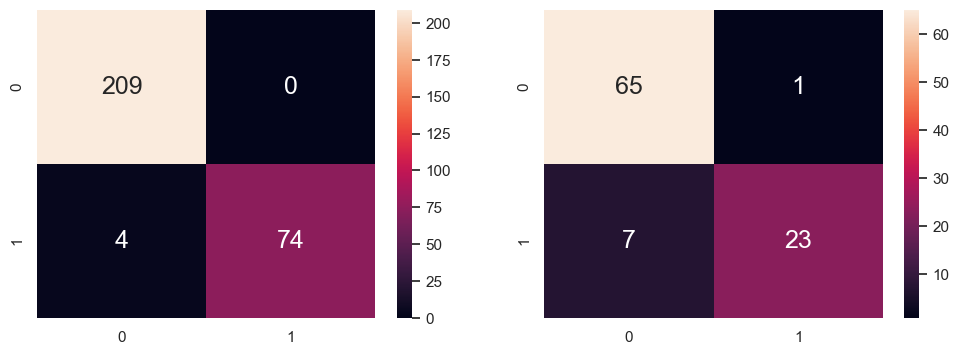

In [22]:
# Predict Response corresponding to Predictors
y_train_pred4 = dectree4.predict(X4_train)
y_test_pred4 = dectree4.predict(X4_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(X4_train, y4_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(X4_test, y4_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y4_train, y_train_pred4),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y4_test, y_test_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Get confusion matrix values for train and test
cm_train4 = confusion_matrix(y4_train, y_train_pred4)
cm_test4 = confusion_matrix(y4_test, y_test_pred4)

# Print rates for both train and test
print_rates(cm_train4, "Train")
print_rates(cm_test4, "Test")

### Test Set Performance Summary

| Metric                              | X1 Test | X2 Test | X3 Test | X4 Test |
|-------------------------------------|---------|---------|---------|---------|
| **Classification Accuracy**         | 0.7604  | 0.8229  | 0.9271  | 0.9167  |
| **False Negative Rate (FNR)**       | 0.8000  | 0.4231  | 0.1154  | 0.2333  |
| **False Positive Rate (FPR)**       | 0.0423  | 0.0857  | 0.0571  | 0.0152  |
| **True Positive Rate (TPR/Recall)** | 0.2000  | 0.5769  | 0.8846  | 0.7667  |
| **True Negative Rate (TNR)**        | 0.9577  | 0.9143  | 0.9429  | 09848  |


Test accuracy ranges from __76.04% to 92.71%__. Models trained on __X3 (92.71%)__ and __X4 (91.67%)__ clearly outperform the others, showing __significantly lower FNRs__ (11.54% and 23.33%) and the __lowest FPRs__ — particularly X4 with just 1.52%. Both models also achieve high recall (88.46% and 76.67%) and excellent specificity, with X4 achieving the highest TNR of 98.48%. These results make X3 and X4 the __most accurate and reliable models__ in the group.
